# List the areas you would look into when it comes to data preperation

The raw data in machine learning project must be pre-processed prior to being used to fit and evaluate a machine learning model. This step in a predictive modeling project is referred to as data preparation.

It involves mainly these stages.
. Data loading
. Data cleaning
. Feature selection
. Feature Engineering

let us first load the data.

In [4]:
import pandas as pd
import numpy as np
from numpy import unique


In [5]:
df=pd.read_excel("MockSurveyData.xlsx")

df.head()

,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,...,tototh_$,totshopping_$,totexp_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,2015-01-01,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.145161,...,0.0,854.853136,1096.186995,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.937500,...,0.0,171.519802,379.309926,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.866667,...,0.0,104.853136,420.727677,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,44,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Others,368.285714,...,0.0,220.853136,378.990074,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,45,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",315.254902,...,0.0,104.853136,342.356298,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


Data Cleaning is the process of identifying and correcting the data that might negatively affect the model performance.
Messy datasets, columns with one value or no value, rows with insignifant values, duplicate rows and columns all are identified during data cleaning and either replaced or removed for betterment of the data set.

Finding Unique valued columns

In [6]:
print (df.nunique())

case                  8043
Year                     2
R.mth                   12
date                   587
intv_nam                34
Country_residence        1
City_residence          59
Purpose_grp              5
Purpose                 40
Weights_QTR            192
Air_Terminal             3
Sea_Terminal             4
Land_Terminal            2
langint                  8
1st_visit                2
length_stay             13
travel_type              3
f1_gender                2
f3_occupation           13
f4_industry             25
f5_designation          12
f5_designation.oth     421
shop_$fash             297
shop_$jew               35
shop_$wat               69
shop_$well             188
shop_$food             178
shop_$gift             116
shop_$ctec             109
shop_$anti              36
shop_$oth              161
shop_$any              713
totacc_$              2239
totfnb_$              1795
tottran_$             1522
totbiz_$                56
totedu_$                16
t

As you can see only country of residence is of same value for all the rows. Rest all contains at least two different inputs.

Next we check for duplicate rows in the dataframe

In [16]:
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [case, Year, R.mth, date, intv_nam, Country_residence, City_residence, Purpose_grp, Purpose, Weights_QTR, Air_Terminal, Sea_Terminal, Land_Terminal, langint, 1st_visit, length_stay, travel_type, f1_gender, f3_occupation, f4_industry, f5_designation, f5_designation.oth, shop_$fash, shop_$jew, shop_$wat, shop_$well, shop_$food, shop_$gift, shop_$ctec, shop_$anti, shop_$oth, shop_$any, totacc_$, totfnb_$, tottran_$, totbiz_$, totedu_$, totmedi_$, tototh_$, totshopping_$, totexp_$, MainAccomm, MainHotel, travel_companion.1, travel_companion.2, travel_companion.3, travel_companion.4, travel_companion.5]
Index: []

[0 rows x 48 columns]


False is the output hence there are no duplicate rows in the dataframe

Checking he datatypes of the columns

In [18]:
df.dtypes

case                           int64
Year                           int64
R.mth                         object
date                  datetime64[ns]
intv_nam                      object
Country_residence             object
City_residence                object
Purpose_grp                   object
Purpose                       object
Weights_QTR                  float64
Air_Terminal                  object
Sea_Terminal                  object
Land_Terminal                 object
langint                       object
1st_visit                     object
length_stay                   object
travel_type                   object
f1_gender                     object
f3_occupation                 object
f4_industry                   object
f5_designation                object
f5_designation.oth            object
shop_$fash                   float64
shop_$jew                    float64
shop_$wat                    float64
shop_$well                   float64
shop_$food                   float64
s

The data frame is a mixture of objects, int, float and datetime format.

The dataframe is largely catteogrical and need to be converted to numerical variable for most of the machine learning purposes. How ever if we are to use convolution neural network as the model it will accept string inputs as pictures and enocode them and process it that way itself hence no need to convert strings into numerical variables.

converting the categorical variables into numericals

In [23]:
data=pd.get_dummies(df)
data.head()

,case,Year,date,Weights_QTR,shop_$fash,shop_$jew,shop_$wat,shop_$well,shop_$food,shop_$gift,...,travel_companion.4_Other relatives,travel_companion.4_Others,travel_companion.4_Parents/ Parents-in-law,travel_companion.4_Siblings,travel_companion.5_Children aged 20-39 yrs,travel_companion.5_Children aged 8-12 yrs,travel_companion.5_Other relatives,travel_companion.5_Others,travel_companion.5_Parents/ Parents-in-law,travel_companion.5_Siblings
0,18,2015,2015-01-01,632.145161,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,41,2015,2015-01-01,341.937500,66.666667,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,43,2015,2015-01-01,432.866667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,44,2015,2015-01-01,368.285714,25.000000,0.0,0.0,0.0,0.0,91.0,...,0,0,0,0,0,0,0,0,0,0
4,45,2015,2015-01-01,315.254902,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# highlight any data idiosyncrasies in the dataset

In [24]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 48 columns):
case                  8887 non-null int64
Year                  8887 non-null int64
R.mth                 8887 non-null object
date                  8887 non-null datetime64[ns]
intv_nam              8887 non-null object
Country_residence     8887 non-null object
City_residence        8887 non-null object
Purpose_grp           8887 non-null object
Purpose               8887 non-null object
Weights_QTR           8887 non-null float64
Air_Terminal          5697 non-null object
Sea_Terminal          2828 non-null object
Land_Terminal         355 non-null object
langint               8887 non-null object
1st_visit             8887 non-null object
length_stay           8887 non-null object
travel_type           8887 non-null object
f1_gender             8887 non-null object
f3_occupation         8887 non-null object
f4_industry           6043 non-null object
f5_designation        5791 

In [25]:
df.describe()

,case,Year,Weights_QTR,shop_$fash,shop_$jew,shop_$wat,shop_$well,shop_$food,shop_$gift,shop_$ctec,...,shop_$any,totacc_$,totfnb_$,tottran_$,totbiz_$,totedu_$,totmedi_$,tototh_$,totshopping_$,totexp_$
count,8887.000000,8887.000000,8887.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000,...,8807.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8.887000e+03,8.887000e+03
mean,11521.140880,2014.503545,592.199788,84.202886,4.073048,5.078301,19.603905,23.220032,7.454479,13.223605,...,167.022502,182.091335,88.972969,35.138836,3.388864,3.001575,216.271980,0.568938,3.155676e+03,3.685110e+03
std,6615.259259,0.500016,352.449669,347.318349,124.264357,80.738276,80.528533,61.717987,34.570943,100.795269,...,443.041314,270.410515,140.990364,45.102560,86.199504,114.616839,2234.957037,7.632622,2.735708e+05,2.736304e+05
min,15.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.086393e+01,8.086393e+01
25%,5623.500000,2014.000000,419.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.633333,0.000000,15.322785,11.361328,0.000000,0.000000,0.000000,0.000000,1.018482e+02,2.070473e+02
50%,11381.000000,2015.000000,534.883333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,77.870370,55.146940,23.197952,0.000000,0.000000,0.000000,0.000000,1.480251e+02,4.279709e+02
75%,17418.500000,2015.000000,666.422535,70.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,175.000000,275.810124,116.015031,42.670908,0.000000,0.000000,0.000000,0.000000,2.680251e+02,8.552404e+02
max,23243.000000,2015.000000,8958.000000,15000.000000,10000.000000,4500.000000,2000.000000,2150.000000,1375.000000,3500.000000,...,15000.000000,3129.199893,5802.015116,786.019694,6000.000000,9000.000000,100000.000000,350.000000,2.578999e+07,2.579524e+07


# Key insights of the data in graphs

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df.head()

,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,...,tototh_$,totshopping_$,totexp_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,2015-01-01,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.145161,...,0.0,854.853136,1096.186995,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.937500,...,0.0,171.519802,379.309926,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.866667,...,0.0,104.853136,420.727677,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,44,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Others,368.285714,...,0.0,220.853136,378.990074,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,45,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",315.254902,...,0.0,104.853136,342.356298,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


TIME RESPECTIVE DIVISIONS

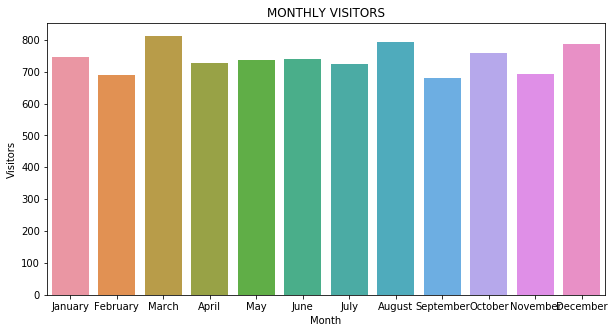

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(df['R.mth'])
plt.xlabel('Month')
plt.ylabel('Visitors')
plt.title('MONTHLY VISITORS')
plt.show()

YEARLY VISITORS

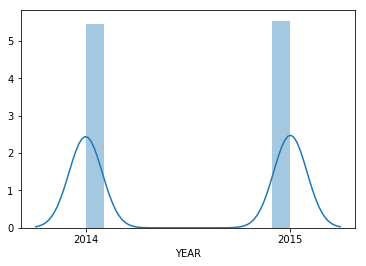

In [12]:
sns.distplot(df['Year'])
plt.xticks([2014, 2015])
plt.xlabel('YEAR')
plt.show()

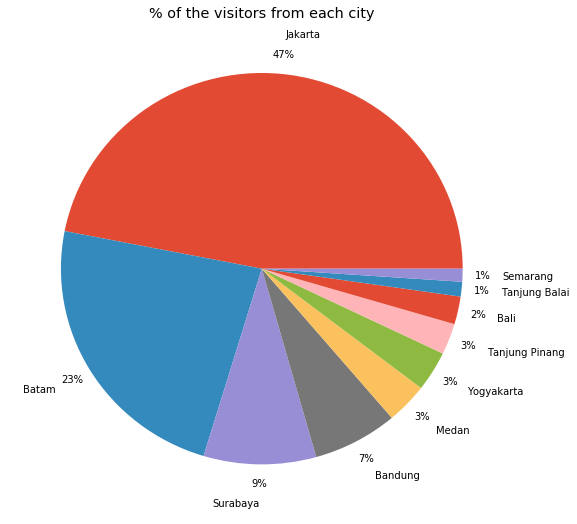

In [13]:
city = pd.DataFrame(df['City_residence'].value_counts())[:10]
city_names = city.index
count = city['City_residence']

plt.style.use('ggplot')
plt.figure(figsize=(9,9))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = city_names, pctdistance=1.1, labeldistance=1.2)
plt.title('% of the visitors from each city')
plt.show()

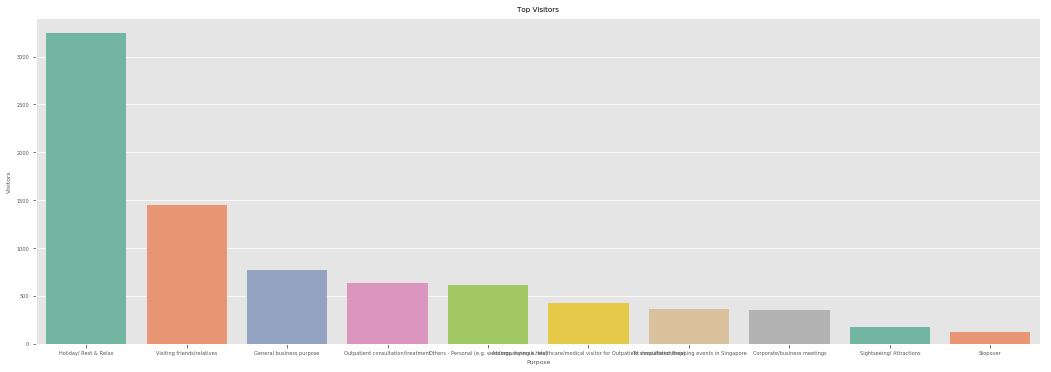

In [14]:
x = pd.DataFrame(df['Purpose'].value_counts()[:10]).rename(index=dict()).index.tolist()
y = pd.DataFrame(df['Purpose'].value_counts()[:10])['Purpose'].tolist()

plt.figure(figsize=(18,6))
plt.rc('font', size=5)
sns.barplot(x=x, y=y, palette='Set2')
plt.xlabel('Purpose')
plt.ylabel('Visitors')
plt.title('Top Visitors')
plt.show()

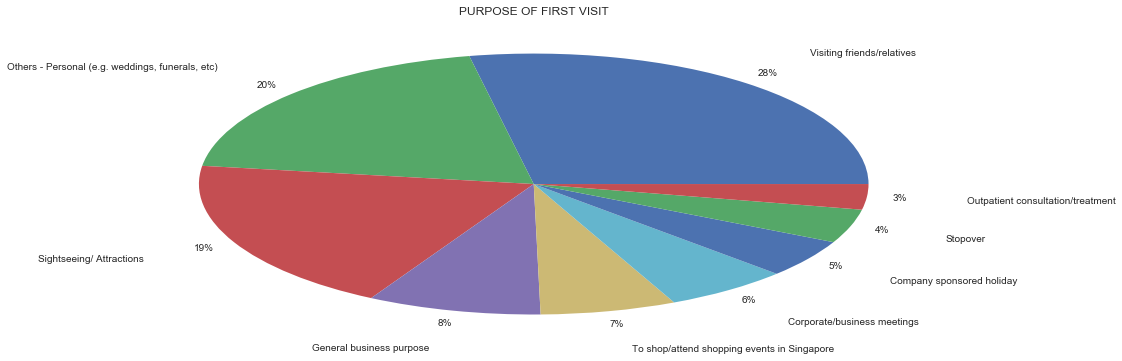

In [52]:
x = pd.DataFrame(df[df['1st_visit']=='Yes']['Purpose'].value_counts()[1:10]).rename(index=dict()).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='Yes']['Purpose'].value_counts()[1:10])['Purpose'].tolist()

plt.figure(figsize=(15,6))
plt.style.use('seaborn')
plt.rc('font', size=10)
plt.pie(y,autopct='%1.0f%%', labels =x, pctdistance=1.1, labeldistance=1.3)
plt.title('PURPOSE OF FIRST VISIT')
plt.show()

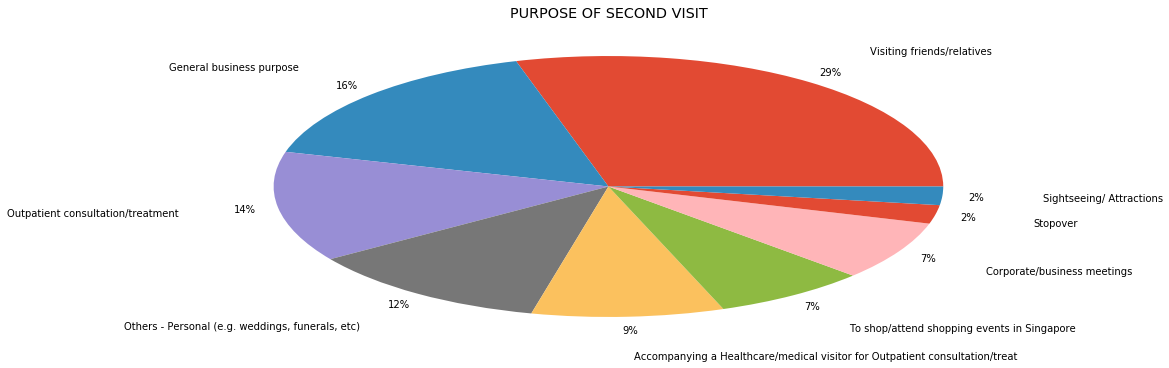

In [15]:
x = pd.DataFrame(df[df['1st_visit']=='No']['Purpose'].value_counts()[1:10]).rename(index=dict()).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='No']['Purpose'].value_counts()[1:10])['Purpose'].tolist()

plt.figure(figsize=(15,6))
plt.style.use('ggplot')
plt.rc('font', size=10)
plt.pie(y,autopct='%1.0f%%', labels =x, pctdistance=1.1, labeldistance=1.3)
plt.title('PURPOSE OF SECOND VISIT')
plt.show()

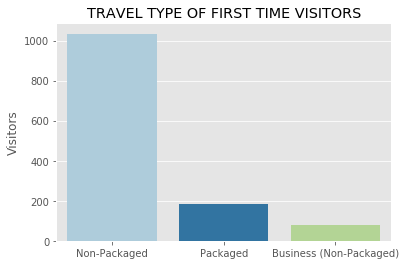

In [21]:
x = pd.DataFrame(df[df['1st_visit']=='Yes']['travel_type'].value_counts()).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='Yes']['travel_type'].value_counts())['travel_type'].tolist()

# plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Paired')
# plt.xlabel('')
plt.ylabel('Visitors')
plt.title('TRAVEL TYPE OF FIRST TIME VISITORS')
plt.show()

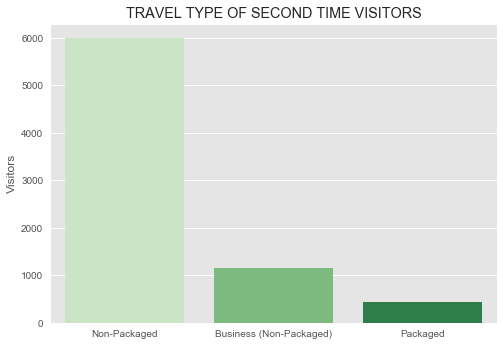

In [60]:
x = pd.DataFrame(df[df['1st_visit']=='No']['travel_type'].value_counts()).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='No']['travel_type'].value_counts())['travel_type'].tolist()

# plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='Greens')
# plt.xlabel('')
plt.ylabel('Visitors')
plt.title('TRAVEL TYPE OF SECOND TIME VISITORS')
plt.show()

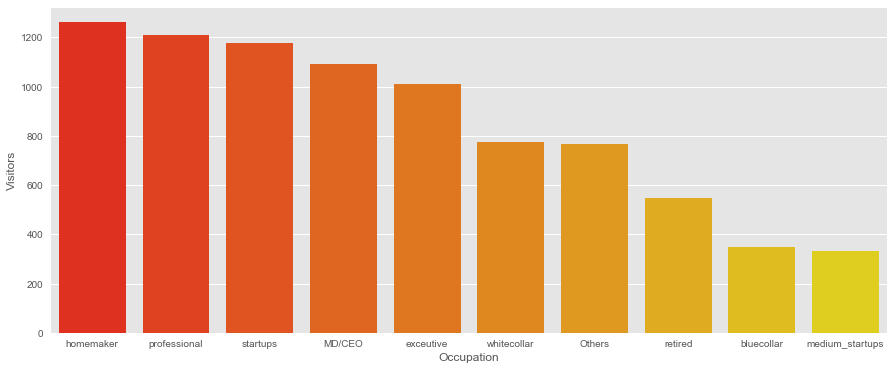

In [63]:
ind_list = ['homemaker','professional','startups','MD/CEO','exceutive','whitecollar','Others','retired','bluecollar','medium_startups','large_startups']
d = dict()
for i, ind in enumerate(pd.DataFrame(df['f3_occupation'].value_counts()[:10]).index.tolist()):
    d[ind] = ind_list[i]
x = pd.DataFrame(df['f3_occupation'].value_counts()[:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df['f3_occupation'].value_counts()[:10])['f3_occupation'].tolist()

plt.figure(figsize=(15,6))
plt.rc('font', size=10)
sns.barplot(x=x, y=y, palette='autumn')
plt.xlabel('Occupation')
plt.ylabel('Visitors')
plt.show()

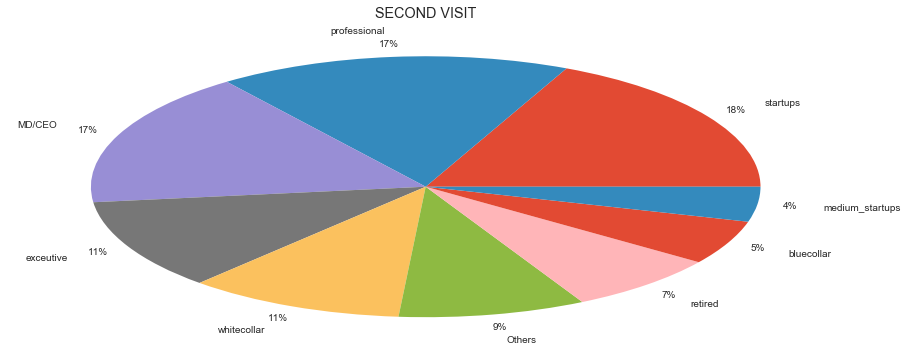

In [66]:
x = pd.DataFrame(df[df['1st_visit']=='No']['f3_occupation'].value_counts()[1:10]).rename(index=d).index.tolist()
y = pd.DataFrame(df[df['1st_visit']=='No']['f3_occupation'].value_counts()[1:10])['f3_occupation'].tolist()

plt.figure(figsize=(15,6))
plt.rc('font', size=10)
plt.pie(y, autopct='%1.0f%%', labels =x, pctdistance=1.1, labeldistance=1.2)
# sns.barplot(x=x, y=y, palette='Set2')

# plt.xlabel('Profession')
# plt.ylabel('Visitors')
plt.title('SECOND VISIT')
plt.show()

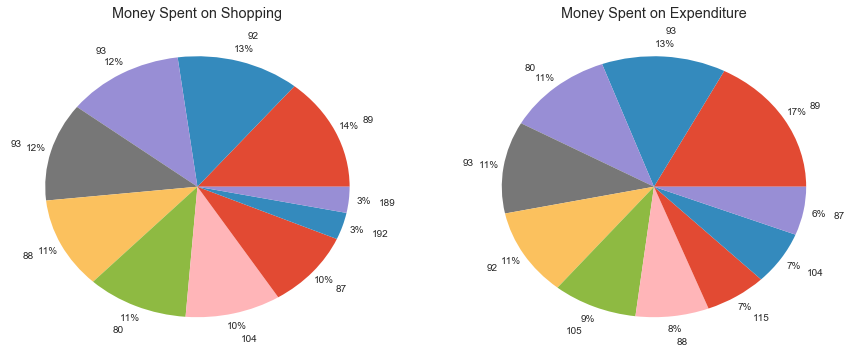

In [68]:
items= [ 'totshopping_$', 'totexp_$']

titles = ['Shopping','Expenditure']
plt.figure(figsize=(15,6))
plt.style.use('ggplot')
for i in range(len(items)):
    plt.subplot(1, 2, i+1)
    thing = pd.DataFrame(df[items[i]].value_counts().sort_values(ascending=False)).reset_index()[0:10]
    money = thing['index'].astype(int)
    count = thing[items[i]]
    plt.pie(count, autopct='%1.0f%%', labels =money, pctdistance=1.1, labeldistance=1.2)
    plt.title('Money Spent on {}'.format(titles[i]))
plt.show()

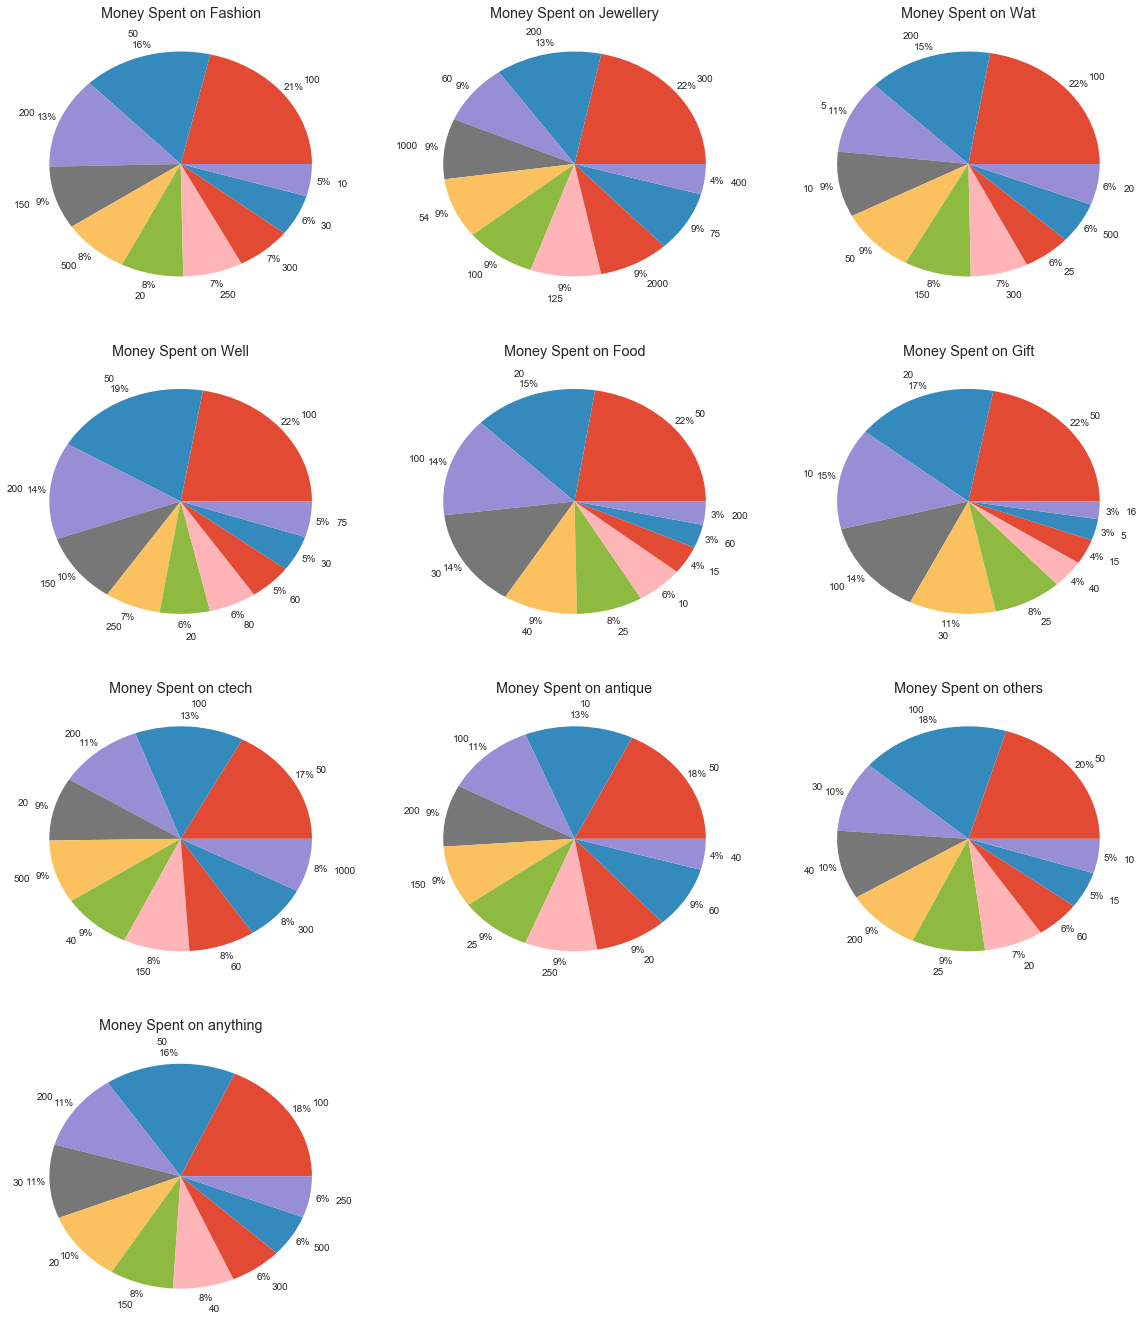

In [69]:
items= ['shop_$fash',
       'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift',
       'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any']

titles = ['Fashion','Jewellery','Wat','Well','Food','Gift','ctech','antique','others','anything']
plt.figure(figsize=(20,30))

for i in range(len(items)):
    plt.subplot(5, 3, i+1)
    thing = pd.DataFrame(df[items[i]].value_counts().sort_values(ascending=False)).reset_index()[1:11]
    money = thing['index'].astype(int)
    count = thing[items[i]]
    plt.pie(count, autopct='%1.0f%%', labels =money, pctdistance=1.1, labeldistance=1.2)
    plt.title('Money Spent on {}'.format(titles[i]))
plt.show()